# Example usage of the cardsort package

To use `cardsort` in a project:

In [32]:
from cardsort import analysis
import pandas as pd
import numpy as np

print(cardsort.__version__)

0.1.0


# Load data
* Input data: csv file (columns: card_id, card_label, category_id, category_label, user_id)
* As created by kardsort.com, "Casolysis Data (.csv) - Recommended" export

In [10]:
path = "example-data.csv"
df = pd.read_csv(path) # a set of 10 cards that has been categorized by 5 users
print(df)

    card_id card_label  category_id     category_label  user_id
0         1        Dog            1               pets        1
1         2      Tiger            1               pets        1
2         3        Cat            1               pets        1
3         4      Apple            2              lunch        1
4         5   Sandwich            2              lunch        1
5         6     Banana            3          long food        1
6         7    Hot Dog            3          long food        1
7         8  Croissant            4        Moon-shaped        1
8         9   Mooncake            4        Moon-shaped        1
9        10       Moon            4        Moon-shaped        1
10       10       Moon            5   Celestial bodies        2
11        9   Mooncake            6          Junk food        2
12        8  Croissant            6          Junk food        2
13        5   Sandwich            6          Junk food        2
14        7    Hot Dog            6     

# Create dendrogram
A quick and easy way to get an overview of your cardsorting results.

Computing distance matrix for user 1
Computing distance matrix for user 2
Computing distance matrix for user 3
Computing distance matrix for user 4
Computing distance matrix for user 5


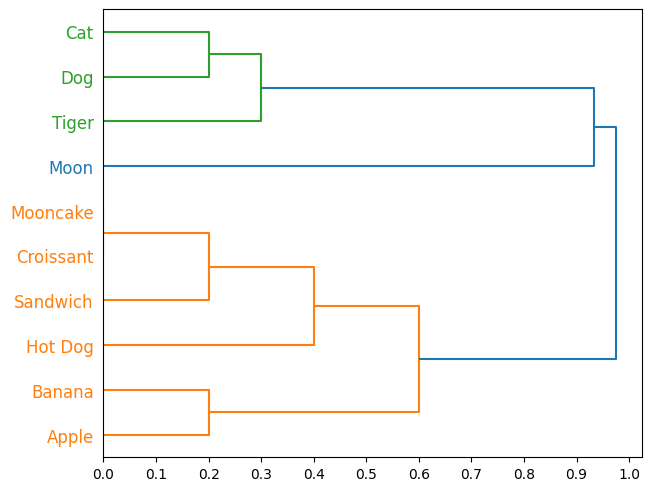

In [11]:
analysis.create_dendrogram(df)

# Get cluster labels 
Find out which category labels users gave to different clusters.

In [19]:
cards = ['Banana', 'Apple'] # the cards in the cluster of interest

# Method 1: Returns a simple list of user-generated labels
analysis.get_cluster_labels(df, cards)

User 1 did not cluster cards together.
User 2 labeled card(s): Healthy snacks
User 3 labeled card(s): Snacks
User 4 labeled card(s): Fruits
User 5 labeled card(s): Food


['Healthy snacks', 'Snacks', 'Fruits', 'Food']

In [21]:
# Method 2: Returns a DataFrame with user_id, cluster_label, and all cards in the cluster
analysis.get_cluster_labels_df(df, cards)

User 1 did not cluster cards together.
User 2 labeled card(s): Healthy snacks
User 3 labeled card(s): Snacks
User 4 labeled card(s): Fruits
User 5 labeled card(s): Food


,user_id,cluster_label,cards
0,2,Healthy snacks,"[Banana, Apple]"
1,3,Snacks,"[Sandwich, Croissant, Banana, Mooncake, Apple]"
2,4,Fruits,"[Apple, Banana]"
3,5,Food,"[Banana, Croissant, Apple, Sandwich, Hot Dog, ..."


# Adapting the dendrogram
You can easily adapt the dendrogram to your needs by specifying parameters.

The function __create_dendrogram__ accepts the following __parameters__:
* __df__ : A DataFrame with your data
* __distance_matrix__ : A pre-calculated condensed distance matrix (see "Advanced usage")
* __count__ : The scale in which you want to present the results in ('absolute': absolute count of users, 'fraction': fractions of users)
* __linkage__ : Linkage method to use when computing the distance between two clusters. Check the scipy.cluster.hierarchy documentation for more information ('average','complete', or 'single')
* __color_treshold__ : Treshold over which to end the coloring of clusters (can be an absolute value, i.e. numbers of users, or a fraction from 0 - 1)

Computing distance matrix for user 1
Computing distance matrix for user 2
Computing distance matrix for user 3
Computing distance matrix for user 4
Computing distance matrix for user 5


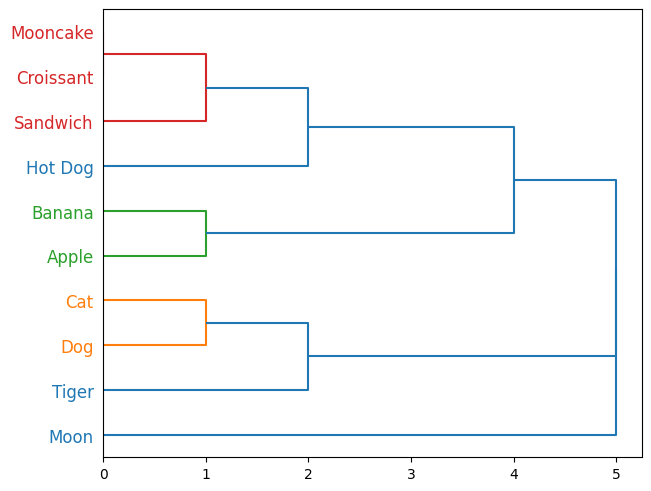

In [41]:
# adaption of the default dendrogram with parameters
analysis.create_dendrogram(df, count='absolute', linkage='complete', color_treshold=2)

# Advanced usage

## Precalculating a condensed distance matrix
The create_dendrogram function automatically calculates a condensed distance matrix based on the pairwise similarity of all cards (this serves as the input of the hierarchical cluster analysis function used in the create_dendrogram function). 

However, there might be cases in which you want to use a separately created condensed distance matrix.

In [25]:
dist = analysis.get_distance_matrix(df) # this function returns a `condensed` distance matrix

Computing distance matrix for user 1
Computing distance matrix for user 2
Computing distance matrix for user 3
Computing distance matrix for user 4
Computing distance matrix for user 5


## Use cases of a separately created condensed distance matrix

### Saving time
If you have a large dataset, you might want to use a pre-calculated distance matrix. This prevents the create_dendrogram function to recalculate the distance matrix anytime you run the function.

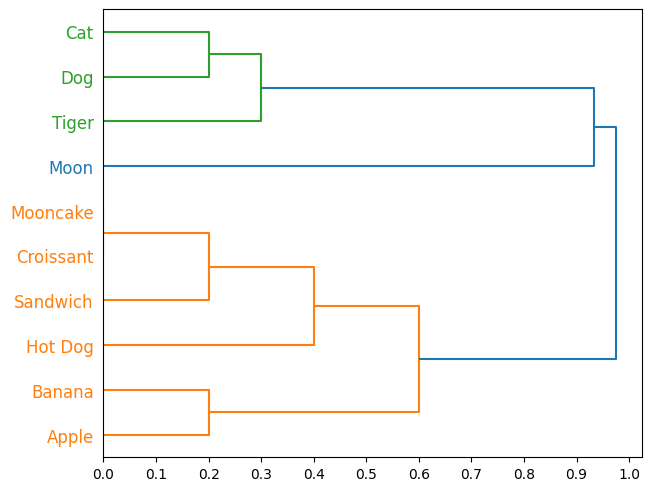

In [29]:
# dist.dump("distance-matrix.dat") # save your distance matrix for later reuse
dist = np.load("distance-matrix.dat", allow_pickle=True) # load pre-calculated distance matrix
analysis.create_dendrogram(df, distance_matrix=dist)

### Creating a custom dendrogram
You can use the pre-calculated distance matrix as input for scipy's hierarchy.dendrogram function to create a fully customized dendrogram, like in the example below.

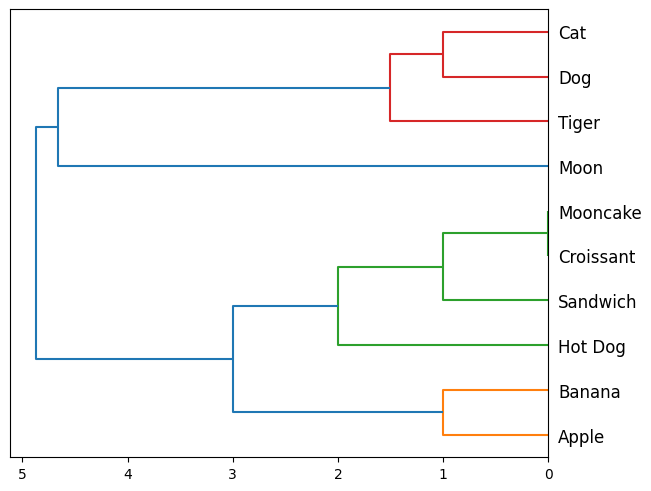

In [38]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Z = hierarchy.linkage(y=dist, method='average') # this method accepts the output of get_distance_matrix as 'y' parameter
plt.figure(layout="constrained")
labels = df.loc[df['user_id'] == 1]['card_label'].squeeze().to_list()
dn = hierarchy.dendrogram(Z, labels=labels, orientation='left', color_threshold=3)
plt.show()